In [74]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier   

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
train_data = pd.read_csv('training.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
train_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
train_data['event'] = train_data['event'].replace({0: 1, 1: 0})

# drop rows with less than 3 non-null values
train_data = train_data.dropna(thresh=5)

# Extract the target column
train_target = train_data['event']

# Fill missing values with the mean
train_data.fillna(train_data.mean(), inplace=True)

#Prepare data use in ML algorithms
X = train_data.drop('event', axis=1).values
y = train_target.values

# Print out the percentage of samples that have the event
print('Default %:', train_target.sum() / train_target.shape[0] * 100)


Default %: 2.218265449959196


In [76]:
import pandas as pd
from sklearn import preprocessing

# Load test data into a pandas DataFrame
test_data = pd.read_csv('test.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
test_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
test_data['event'] = test_data['event'].replace({0: 1, 1: 0})

# Extract the target column
test_target = test_data['event']

# Fill missing values with the mean from the training data
test_data.fillna(train_data.mean(), inplace=True)

X_test = test_data.drop('event', axis=1).values
y_test = test_target.values

# Print out the percentage of samples that have the event
print('Default %:', test_target.sum() / test_target.shape[0] * 100)


Default %: 2.5004605670836892


In [77]:
import scorecardpy as sc
print(pd.__version__)

# Create woebin bins
bins = sc.woebin(train_data, y ="event", num_breaks=5, min_perc_fine=0.05, min_perc_coarse=0.1)
                
# Concatenate the bins into a single DataFrame
bins_df = pd.concat([pd.DataFrame(bins[var]) for var in bins])

1.1.3
[INFO] creating woe binning ...
Binning on 67395 rows and 9 columns in 00:00:22


-------- 1/4 var1 --------
>>> dt[var1].describe(): 
count    67395.000000
mean         2.118648
std          4.069041
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        121.000000
Name: var1, dtype: float64 



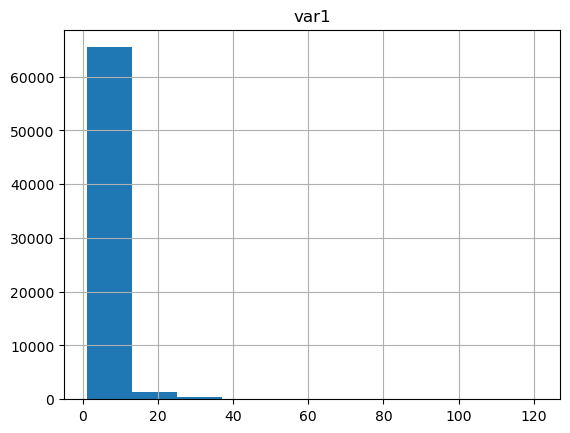

>>> Current breaks:
2.0,4.0 



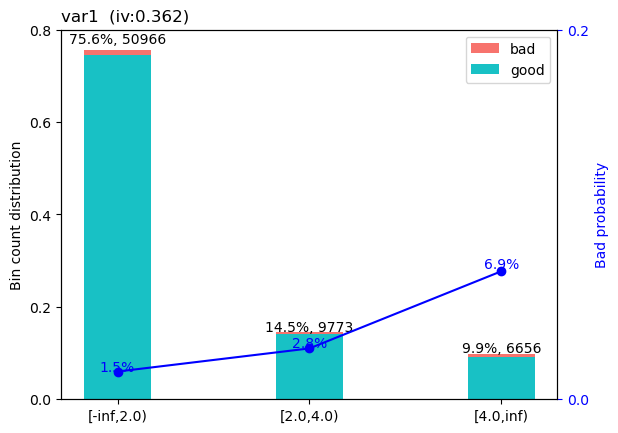

>>> Adjust breaks for (1/4) var1?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/4 var4 --------
>>> dt[var4].describe(): 
count    67395.000000
mean        11.732548
std          2.942343
min          1.000000
25%         11.732548
50%         13.000000
75%         13.000000
max         13.000000
Name: var4, dtype: float64 



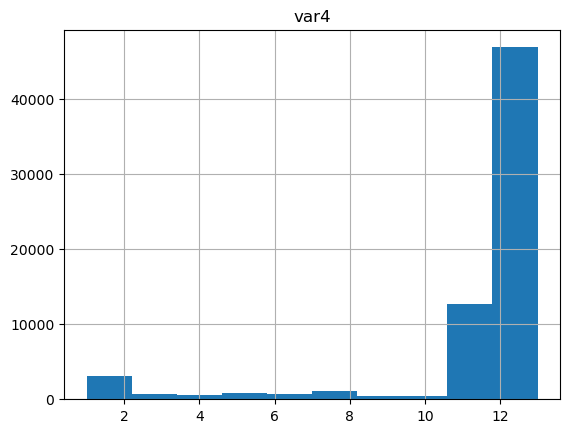

>>> Current breaks:
8.0,12.0 



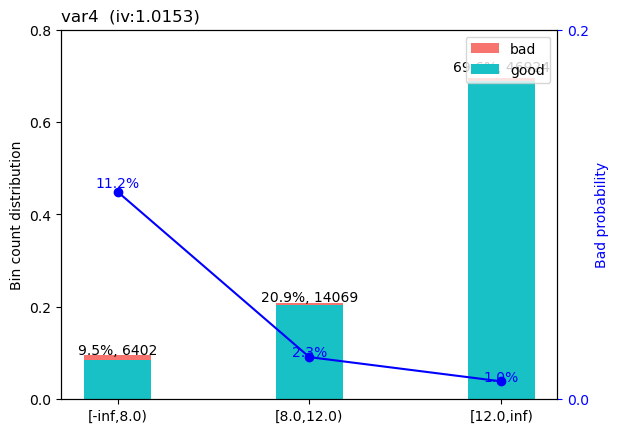

>>> Adjust breaks for (2/4) var4?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/4 var7 --------
>>> dt[var7].describe(): 
count    67395.000000
mean        20.605911
std          3.853144
min          2.000000
25%         20.605911
50%         20.605911
75%         24.000000
max         24.000000
Name: var7, dtype: float64 



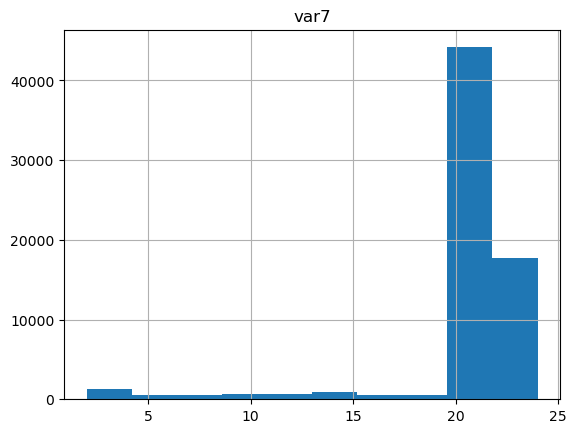

>>> Current breaks:
18.0,21.0 



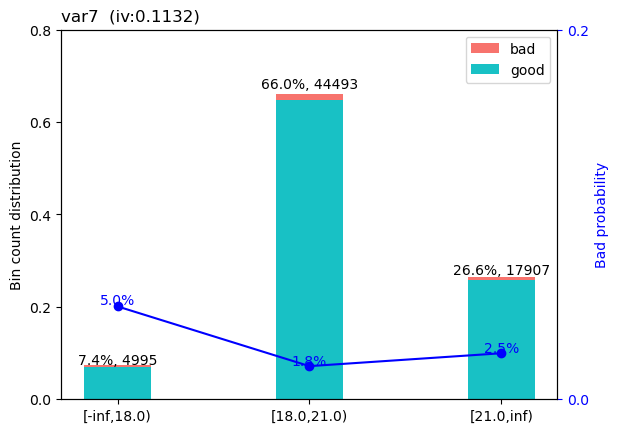

>>> Adjust breaks for (3/4) var7?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/4 var8 --------
>>> dt[var8].describe(): 
count    67395.000000
mean        55.985438
std         10.657280
min         24.416667
25%         48.583333
50%         55.985438
75%         62.777778
max        107.416667
Name: var8, dtype: float64 



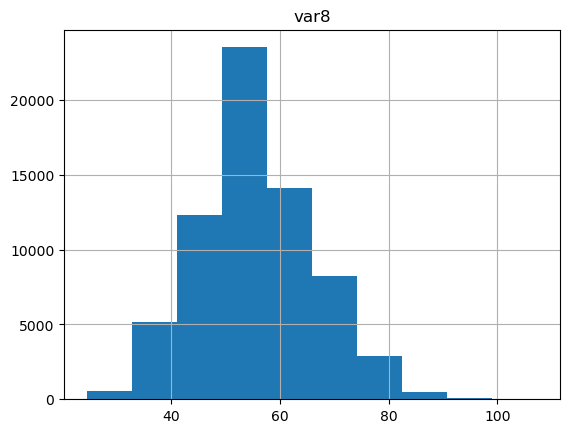

>>> Current breaks:
56.0,62.0,74.0 



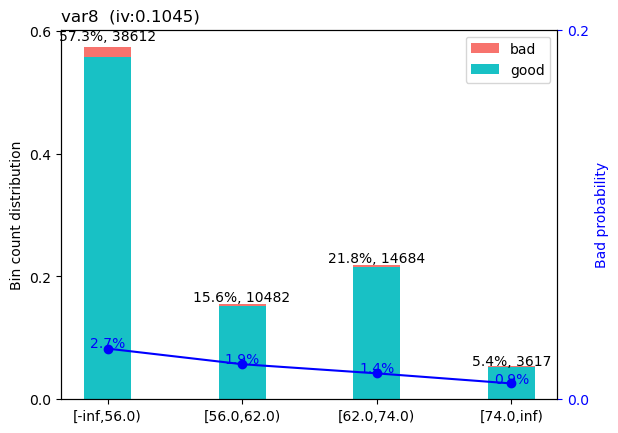

>>> Adjust breaks for (4/4) var8?
1: next 
2: yes 
3: back
Selection: 1
[INFO] creating woe binning ...


In [78]:
# binning adjustment - optimizing the binning results and improving the accuracy 
# adjust breaks interactively
breaks_adj = sc.woebin_adj(train_data, y="event", bins=bins) 
#or specify bin breaks manually
bins_adj = sc.woebin(train_data, y="event", breaks_list=breaks_adj)

Number of class 1 examples before: (1495, 8)
Number of class 1 examples after: (65900, 8)
(67395, 8)
(65900, 8)
(67395,)
(65900,)


(array([65900.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 65900.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

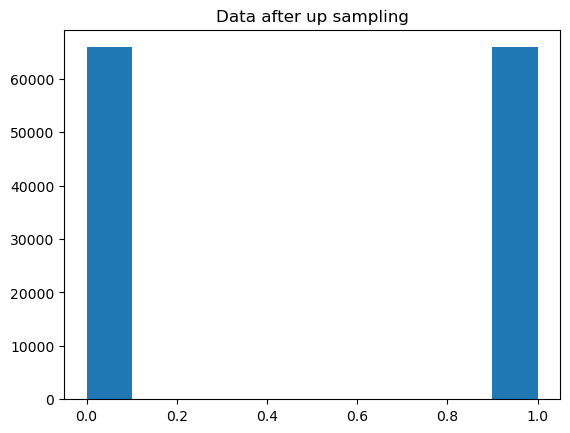

In [79]:

X_train=train_data.drop("event" ,axis= 1)
y_train=train_target

print('Number of class 1 examples before:', X_train[y_train == 1].shape)



X_upsampled, y_upsampled = resample(X_train[y_train == 1],
                                    y_train[y_train == 1],
                                    replace=True,
                                    n_samples=X_train[y_train == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X_upsampled.shape)
#print('Number of class 1 examples after:', y_upsampled.shape)

#UPSAMPLE


print(X_train.shape)
print(X_upsampled.shape)
print(y_train.shape)
print(y_upsampled.shape)

X_bal = np.vstack((X_train[y_train==0], X_upsampled))
y_bal = np.hstack((y_train[y_train==0], y_upsampled))

#check the data label balance
plt.title('Data after up sampling')
plt.hist(y_bal)

(131800, 8)
(59709, 8)
(131800,)
(59709,)


(array([65900.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 65900.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

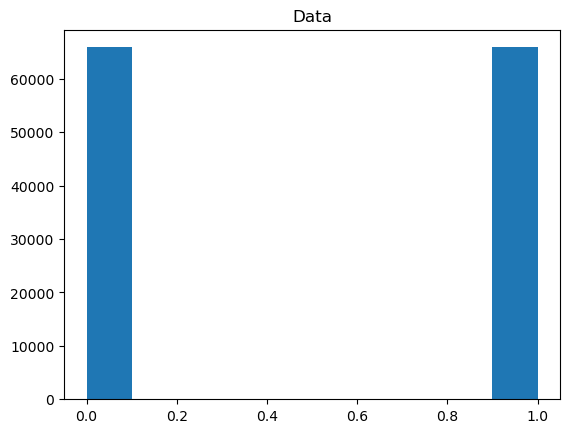

In [80]:
from sklearn.model_selection import train_test_split

X_train=X_bal
X_test
y_train=y_bal
y_test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

plt.title('Data')
plt.hist(y_train)

In [81]:
X_train=pd.DataFrame(X_train,columns=train_data.columns[1:])

In [82]:
# converting train and test into woe values
train_woe = sc.woebin_ply(X_train, bins)
test_woe = sc.woebin_ply(pd.DataFrame(X_test, columns=X_train.columns), bins)

X_train = train_woe
X_test = pd.DataFrame(test_woe, columns=X_train.columns)




[INFO] converting into woe values ...
[INFO] converting into woe values ...


In [83]:
X_test

,var4_woe,var2_woe,var6_woe,var8_woe,var3_woe,var1_woe,var7_woe,var5_woe
0,-0.840231,-1.204774,0.0,-0.466497,0.613787,-0.397902,-0.216868,0.0
1,1.718639,-0.643180,0.0,0.217584,0.078207,0.221256,-0.216868,0.0
2,-0.840231,-1.204774,0.0,-0.964793,-1.646836,-0.397902,-0.216868,0.0
3,-0.840231,-0.643180,0.0,-0.964793,0.613787,-0.397902,-0.216868,0.0
4,0.028805,-1.204774,0.0,-0.964793,0.078207,-0.397902,-0.216868,0.0
...,...,...,...,...,...,...,...,...
59704,0.028805,-0.643180,0.0,0.217584,0.078207,-0.397902,-0.216868,0.0
59705,0.028805,-0.643180,0.0,0.217584,0.078207,0.221256,-0.216868,0.0
59706,0.028805,-1.204774,0.0,0.217584,0.078207,-0.397902,-0.216868,0.0
59707,0.028805,-0.643180,0.0,0.217584,0.078207,0.221256,-0.216868,0.0


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Load data into a pandas DataFrame
train1_data = pd.read_csv('training.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
train1_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
train1_data['event'] = train1_data['event'].replace({0: 1, 1: 0})

# drop rows with less than 3 non-null values
train1_data = train1_data.dropna(thresh=5)

# Extract the target column
train1_target = train1_data['event']

# Fill missing values with the mean
train1_data.fillna(train1_data.mean(), inplace=True)

X_train1 = train1_data.drop('event', axis=1).values
y_train1 = train1_target.values

In [85]:
# Load test data into a pandas DataFrame
test1_data = pd.read_csv('test.csv', index_col='id')

# Drop the 'split' column, which has no impact on the event
test1_data.drop(columns=['split'], inplace=True)

# Invert the event values to give more weight to the minority class
test1_data['event'] = test1_data['event'].replace({0: 1, 1: 0})

# Extract the target column
test1_target = test1_data['event']

# Fill missing values with the mean from the training data
test1_data.fillna(train1_data.mean(), inplace=True)

X_test1 = test1_data.drop('event', axis=1).values
y_test1 = test1_target.values


In [86]:
X_train1=pd.DataFrame(X_train1,columns=train1_data.columns[1:])
X_test1=pd.DataFrame(X_test1,columns=test1_data.columns[1:])

In [87]:
print(X_train1.shape)
print(X_test1.shape)

(67395, 8)
(59709, 8)


Number of class 1 examples before: (1495, 8)
Number of class 1 examples after: (65900, 8)
(67395, 8)
(65900, 8)
(67395,)
(65900,)


(array([65900.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 65900.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

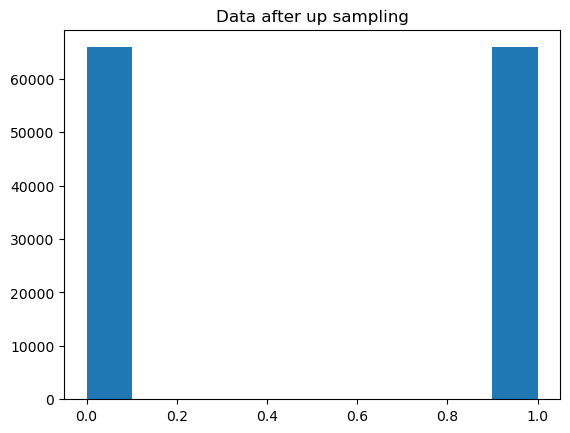

In [88]:
#Up-sampling - address class imbalance / prevent bias toward majority class
from sklearn.utils import resample



X_train1=train1_data.drop("event" ,axis= 1)
y_train1=train1_target

print('Number of class 1 examples before:', X_train1[y_train1 == 1].shape)



X1_upsampled, y1_upsampled = resample(X_train1[y_train1 == 1],
                                    y_train1[y_train1 == 1],
                                    replace=True,
                                    n_samples=X_train1[y_train1 == 0].shape[0],
                                    random_state=123)

print('Number of class 1 examples after:', X1_upsampled.shape)
#print('Number of class 1 examples after:', y_upsampled.shape)

#UPSAMPLE


print(X_train1.shape)
print(X1_upsampled.shape)
print(y_train1.shape)
print(y1_upsampled.shape)

X1_bal = np.vstack((X_train1[y_train1==0], X1_upsampled))
y1_bal = np.hstack((y_train1[y_train1==0], y1_upsampled))

#check the data label balance
plt.title('Data after up sampling')
plt.hist(y1_bal)

(131800, 8)
(59709, 8)
(131800,)
(59709,)


(array([65900.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 65900.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

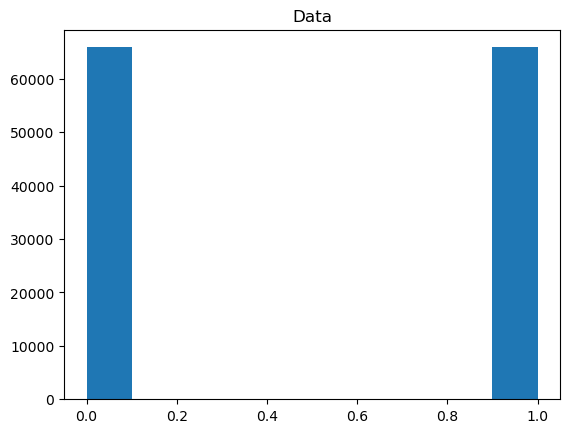

In [89]:
from sklearn.model_selection import train_test_split

X_train1=X1_bal
X_test1
y_train1=y1_bal
y_test1

print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

plt.title('Data')
plt.hist(y_train1)

In [90]:
X_train1=pd.DataFrame(X_train1,columns=train1_data.columns[1:])

In [91]:
# add the original variables back into the train and test dataframes
X_train = pd.concat([X_train1.reset_index(drop=True), X_train.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test1.reset_index(drop=True), X_test.reset_index(drop=True)], axis=1)

# print the train and test dataframes
print('X_train:\n', X_train.head())
print('X_test:\n', X_test.head())


X_train:
    var1          var2       var3       var4        var5       var6       var7  \
0   2.0  7.522327e+06   1.163336  13.000000  213.620354  33.502923  20.605911   
1   1.0  5.661878e+05   0.646621  13.000000  213.620354  33.502923  20.605911   
2  13.0  8.810127e+03  12.281068  13.000000  213.620354  33.502923  24.000000   
3   1.0  1.194820e+06  12.281068  11.732548    4.893348   0.016672  20.605911   
4   1.0  8.041781e+05   4.453691  13.000000  213.620354  33.502923  24.000000   

        var8  var4_woe  var2_woe  var6_woe  var8_woe  var3_woe  var1_woe  \
0  45.375000 -0.840231 -1.204774       0.0  0.217584 -1.134044  0.221256   
1  53.083333 -0.840231 -0.029118       0.0  0.217584  0.613787 -0.397902   
2  58.250000 -0.840231  0.621945       0.0 -0.158930  0.078207  1.187912   
3  68.500000  0.028805 -0.643180       0.0 -0.466497  0.078207 -0.397902   
4  71.333333 -0.840231 -0.029118       0.0 -0.466497 -1.134044 -0.397902   

   var7_woe  var5_woe  
0 -0.216868       0.0 

In [92]:
X_test = X_test[X_train.columns]

0.9749953943291632
              precision    recall  f1-score   support

           0     0.9750    1.0000    0.9873     58216
           1     0.0000    0.0000    0.0000      1493

    accuracy                         0.9750     59709
   macro avg     0.4875    0.5000    0.4937     59709
weighted avg     0.9506    0.9750    0.9627     59709



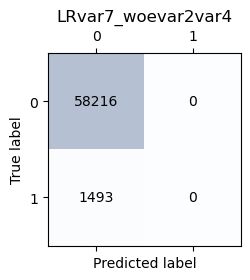

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


listfeature=['var7_woe', 'var2', 'var4']

clf = LogisticRegression(penalty='l2', 
                          C=1e-3,
                          solver='lbfgs',
                          random_state=1)

clf.fit(X_train[listfeature], y_train)

print(clf.score(X_test[listfeature],y_test))
print(classification_report(y_test, clf.predict(X_test[listfeature]),digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))
#print(confmat)

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('LR'+''.join(listfeature))

plt.show()

In [94]:
from sklearn.metrics import roc_auc_score

# Use the trained classifier to predict probabilities for the test set
y_proba = clf.predict_proba(X_test[listfeature])[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_proba)

print('AUC-ROC score:', auc_roc)


AUC-ROC score: 0.5702924340431242


0.44257984558441776
              precision    recall  f1-score   support

           0     0.9905    0.4324    0.6020     58216
           1     0.0365    0.8379    0.0699      1493

    accuracy                         0.4426     59709
   macro avg     0.5135    0.6352    0.3360     59709
weighted avg     0.9666    0.4426    0.5887     59709



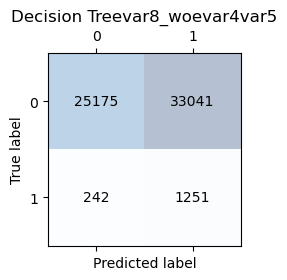

In [95]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

listfeature=['var8_woe', 'var4', 'var5']

clf = DecisionTreeClassifier(max_depth=3, random_state=1)

clf.fit(X_train[listfeature], y_train)

print(clf.score(X_test[listfeature], y_test))
print(classification_report(y_test, clf.predict(X_test[listfeature]), digits=4))

confmat = confusion_matrix(y_test, clf.predict(X_test[listfeature]))

fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.title('Decision Tree' + ''.join(listfeature))

plt.show()


In [96]:
from sklearn.metrics import roc_auc_score

# Use the trained classifier to predict probabilities for the test set
y_proba = clf.predict_proba(X_test[listfeature])[:, 1]

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_proba)

print('AUC-ROC score:', auc_roc)


AUC-ROC score: 0.6785478320292921


In [28]:
import numpy as np

# Get the indices of the maximum coefficient values
max_coef_idx = np.unique(logistic_l1.coef_.argmax(axis=1))

# Fit a logistic regression model with the selected features and obtain p-values
X_train_selected = X_train[:, max_coef_idx]
logit_model = sm.Logit(y_train, sm.add_constant(X_train_selected)).fit(disp=0)
max_coef_pvalues = logit_model.pvalues[1:]

# Print the results
print('Maximum coefficient values:')
print(max_coef)
print('Their corresponding p-values:')
print(max_coef_pvalues)


Maximum coefficient values:
[ 2.83812090e-02  6.41219904e-11 -4.63057377e-06 -1.30913709e-01
 -1.59212784e-04 -4.59007385e-06  2.07892671e-02  8.10168736e-03
  3.23215381e-01  7.07843015e-01  0.00000000e+00  9.94530353e-01
  8.26134285e-01  2.75824539e-01  8.18303409e-01  0.00000000e+00]
Their corresponding p-values:
[0.]


In [129]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Convert X to a pandas DataFrame, if needed
X_train = pd.DataFrame(X_train)

# Select the important variables
selected_vars = ['var7_woe', 'var2', 'var4']

# Fit a logistic regression model with the selected features and obtain the coefficients
logit_model = sm.Logit(y_train, X_train[selected_vars]).fit(disp=0)
coefficients = logit_model.params

# Print the coefficients
print('Coefficients:')
print(coefficients)


Coefficients:
var7_woe    9.747916e-01
var2       -9.870661e-09
var4       -3.869501e-02
dtype: float64


In [130]:
# Convert X_test to a pandas DataFrame, if needed
X_test = pd.DataFrame(X_test)

# Select the same set of important variables as for the training data
X_test_selected = X_test[selected_vars]

# Calculate the predicted probabilities for the test data using the logistic regression equation
probs = logit_model.predict(X_test_selected)

# Convert the predicted probabilities to binary predictions using a threshold of 0.5
predictions = np.where(probs > 0.5, 1, 0)

# Create a confusion matrix to evaluate the performance of the model on the test data
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

# Calculate the accuracy, precision, recall, and F1-score using the values from the confusion matrix
accuracy = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * precision * recall / (precision + recall)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Calculate the AUC-ROC to evaluate the overall performance of the model
from sklearn.metrics import roc_auc_score
auc_roc = roc_auc_score(y_test, probs)
print("AUC-ROC:", auc_roc)


Confusion Matrix:
[[56759  1457]
 [ 1414    79]]
Accuracy: 0.9519167964628448
Precision: 0.051432291666666664
Recall: 0.05291359678499665
F1-score: 0.052162429844833276
AUC-ROC: 0.6345292679105948


In [123]:
from sklearn.metrics import precision_score, roc_auc_score

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)
# Calculate AUC-ROC
auc_roc = roc_auc_score(y_test, probs)
print("AUC-ROC:", auc_roc)

Precision: 0.10569948186528498
AUC-ROC: 0.6826246189330614
